In [34]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

In [35]:
# load raw
subject_id = 4
before_or_after = 'after'
raw_path = os.path.join('..', '..', 'data', str(subject_id), 'repaired_' + before_or_after + '.fif')
raw = mne.io.read_raw_fif(raw_path, preload=True, verbose=False)
# raw.plot()
print(raw.info['subject_info'],raw.info['experimenter'])

{'id': 4} after


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_17852\2931675773.py:5: RuntimeWarning: This filename (..\..\data\4\repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True, verbose=False)


120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
104 events found
Event IDs: [1]


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_17852\4207455797.py:20: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],


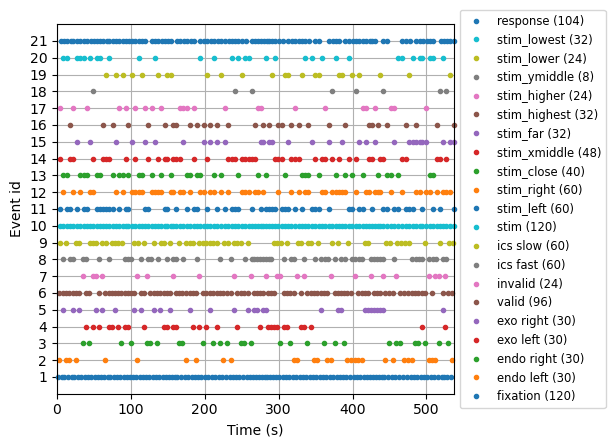

In [36]:
# Extract channel names and types
ch_names = raw.info['ch_names']
ch_types = ['misc'] + ['eeg'] * 32 + ['misc'] + ['stim'] * 21

# Detect events
stim_channel_names = [ch_name for ch_name, ch_type in zip(ch_names, ch_types) if ch_type == 'stim']
events = np.array([], dtype=int).reshape(0, 3)  # Create an empty events array with 3 columns

for idx, stim_channel_name in enumerate(stim_channel_names):
    single_event = mne.find_events(raw, stim_channel=stim_channel_name, min_duration=1/raw.info['sfreq'])

    # Update the event id in single_event (the third column) to be idx + 1
    single_event[:, 2] = idx + 1

    # Concatenate single_event to the events array
    events = np.vstack([events, single_event])

event_dict = {stim_channel_name: idx + 1 for idx, stim_channel_name in enumerate(stim_channel_names)}

fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)


In [37]:
# Create epochs based on event id 1
epochs = mne.Epochs(raw, events, event_id=1, tmin=-0.1, tmax=0.3, preload=True)

# Find the indices of trials that also have event id 2 or 3
event_ids_2_3 = events[np.isin(events[:, 2], [2, 3])]
trials_with_2_3 = [np.where(np.isin(event_id_1[:, 0], event[:, 0]))[0] for event in event_ids_2_3]
trials_with_2_3 = np.unique(np.concatenate(trials_with_2_3))

# Pick the trials based on the found indices
epochs_with_2_3 = epochs[trials_with_2_3]

# Plot the epochs
epochs_with_2_3.plot_image(picks=['Cz', 'P6'])


Not setting metadata
120 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 481 original time points ...
0 bad epochs dropped


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Not setting metadata
120 matching events found
Setting baseline interval to [-1.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 6097 original time points ...
1 bad epochs dropped
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


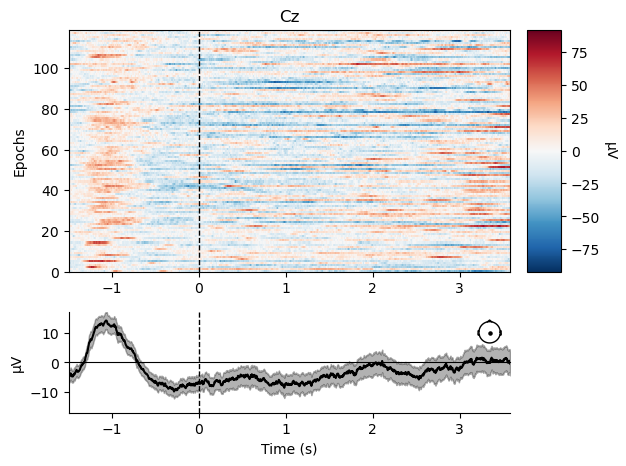

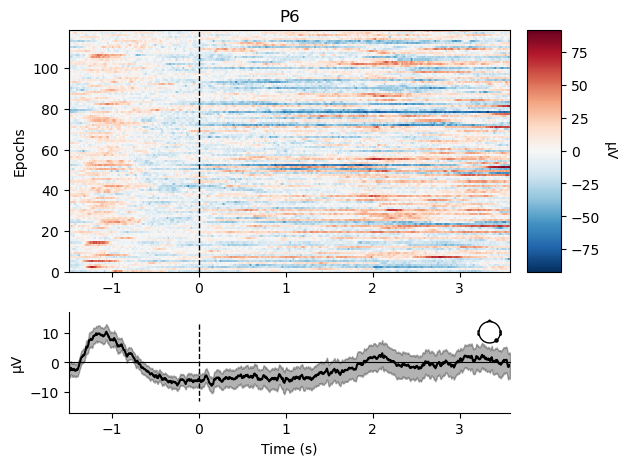

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [ ]:
# Create epochs with the interested events
epochs = mne.Epochs(raw, events, event_id=1, tmin=-1.5, tmax=3.58, preload=True)

# Plot the epochs
epochs.plot_image(picks=['Cz', 'P6'])

Not setting metadata
48 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 48 events and 481 original time points ...
0 bad epochs dropped


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_17852\2850414596.py:16: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, intersected_events, event_id={'picked_events': 8}, tmin=-0.1, tmax=0.3, preload=True)


Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


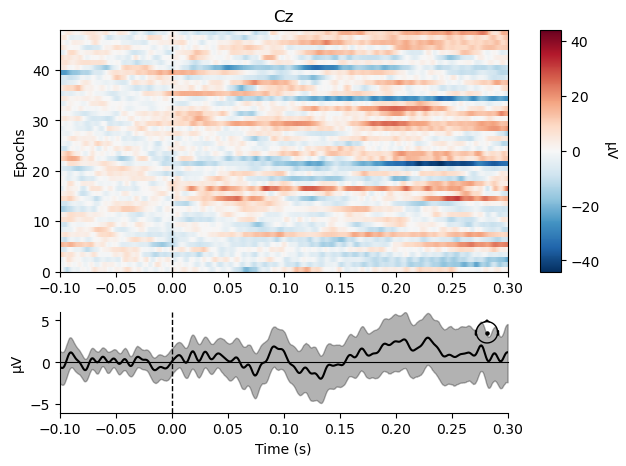

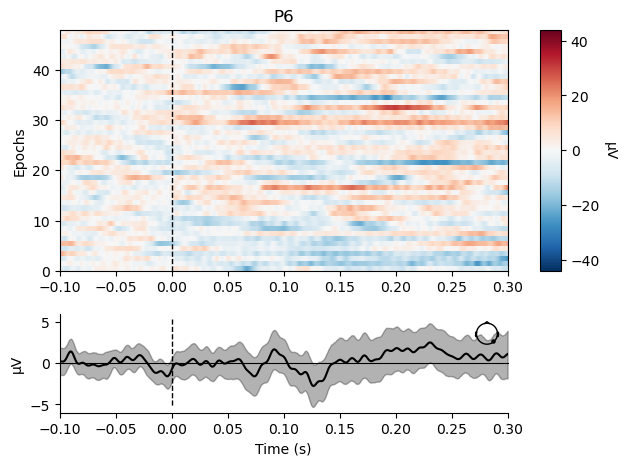

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [ ]:
# Create separate events arrays for events to merge (2 and 3) and the event to intersect with (6)
events_to_merge = events[np.isin(events[:, 2], [2, 3])]
event_to_intersect = events[events[:, 2] == 6]

# Merge events 2 and 3 by changing their event ids to a new id (e.g., 8)
merged_events = events_to_merge.copy()
merged_events[:, 2] = 8

# Find the intersection between the merged events and event 6
intersection_samples = np.intersect1d(merged_events[:, 0], event_to_intersect[:, 0])

# Create a new events array with the intersected events
intersected_events = merged_events[np.isin(merged_events[:, 0], intersection_samples)]

# Create epochs with the intersected events
epochs = mne.Epochs(raw, intersected_events, event_id={'picked_events': 8}, tmin=-0.1, tmax=0.3, preload=True)

# Plot the epochs
epochs.plot_image(picks=['Cz', 'P6'])